<a href="https://colab.research.google.com/github/Zeenat85/RigVIT/blob/main/Agglomerate_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agglomerate hierarchical** **clustering**
In the management of a financial portfolio one important consideration is the correlations between the portfolio's various stocks.
For this analysis we will make use of an unsupervised machine learning technique called **agglomerate hierarchical clustering**. This technique looks for clusters in a dataset without needing to know exactly what the meaning of these clusters are.

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 5.9 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
#Loading relevant packages
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas_datareader import data as web
import matplotlib.cm as cm

In [ ]:
#Creating a list of stock symbols/tickers
stock_list = ['ADANIPORTS.NS','ARVIND.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS','CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GILLETTE.NS', 'GOKEX.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'IBREALEST.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS',  'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS',  'TCS.NS', 'TATACONSUM.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS','WIPRO.NS']


In [ ]:
#start and end date for obtaining historical data
start_date = '2010-11-04'
today = datetime.today().strftime('%Y-%m-%d')

In [ ]:
start_year = 2010   #get data from start_year to today
window = 7          #rolling window for taking the mean Adj Close price
#downloading historical data
data = yf.download(stock_list, start_date, today)['Adj Close']
print(data)

[*********************100%***********************]  53 of 53 completed
            ADANIPORTS.NS   ARVIND.NS  ...      UPL.NS    WIPRO.NS
Date                                   ...                        
2010-11-04     151.755386   17.963020  ...  123.952675  146.501984
2010-11-08     151.943680   18.721390  ...  122.698860  144.640259
2010-11-09     152.743851   19.078272  ...  120.482819  144.791260
2010-11-10     150.531555   19.687944  ...  120.891037  146.434875
2010-11-11     146.295212   19.658203  ...  119.316475  143.784927
...                   ...         ...  ...         ...         ...
2021-11-30     683.849976  116.900002  ...  681.700012  637.250000
2021-12-01     707.950012  115.699997  ...  690.500000  634.799988
2021-12-02     739.099976  116.500000  ...  698.200012  646.799988
2021-12-03     737.450012  116.849998  ...  712.750000  640.750000
2021-12-06     723.450012  112.199997  ...  716.549988  624.500000

[2731 rows x 53 columns]


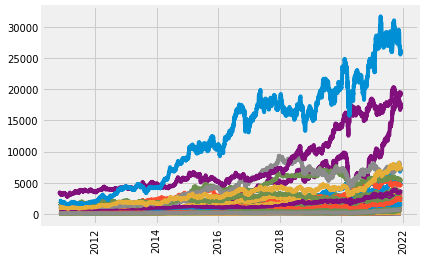

In [ ]:
#A messy plot of all the processed adjusted closing prices
%matplotlib inline
plt.plot(data);
plt.xticks(rotation='vertical');

**Distance Measure for clustering**

In order to cluster the stocks we need an inherest distance measurement. The most popular one which we will use is the standard correlation coefficient:

ρ(x,y)=cov(x,y)/σxσy 

In the correlation matrix plotted below, red/blue colours indicate high/low correlation. We will notice a perfect 1:1 correlation along the diagonal as expected (all stocks have a perfect correlation with themselves).

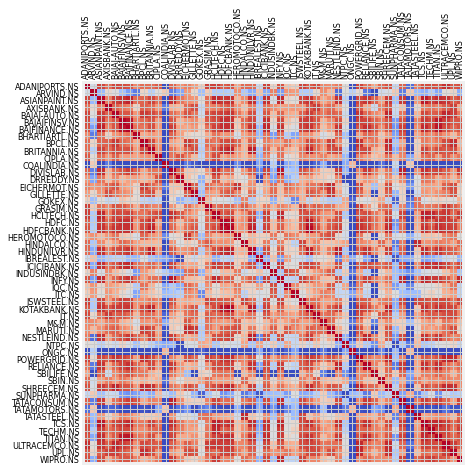

In [ ]:
#find correlation matrix, i.e. the "distances" between each stock
corr = data.corr()
size = 7
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8);

**Clusters of Correlation - Agglomerate**

The next step is to look for clusters of correlations using the agglomerate hierarchical clustering technique. Its primary advantage over other clustering methods is that we don't need to guess in advance how many clusters there might be. Agglomerate Clustering first assigns each data point into its own cluster, and gradually merges clusters until only one remains. It's then up to the user to choose a cutoff threshold and decide how many clusters are present.

Linkage does the actual clustering in one line of code, and returns a list of the clusters joined in the format: 

Z=[stock_1, stock_2, distance, sample_count]

There are also different options for the measurement of the distance. The option we will choose is the average distance measurement, but others are possible (ward, single, centroid, etc.).

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(corr, 'average')
Z[0]

array([ 6.        , 49.        ,  0.10970066,  2.        ])

**Cophenetic Correlation coefficient**

It's important to get a sense of how well the clustering performs. One measure is the Cophenetic Correlation Coefficient,  c . This compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. **The closer  c  is to 1, the better the clustering preserves the original distances**. **Generally  c  > 0.7 is consistered a good cluster fit.** Of course, other accuracy checks are possible.

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab
c, coph_dists = cophenet(Z, pdist(corr))
c

0.9466426726278964

**Dendogram**

The best way to visualize an agglomerate clustering algorithm is through a dendogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. The "distance" between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.

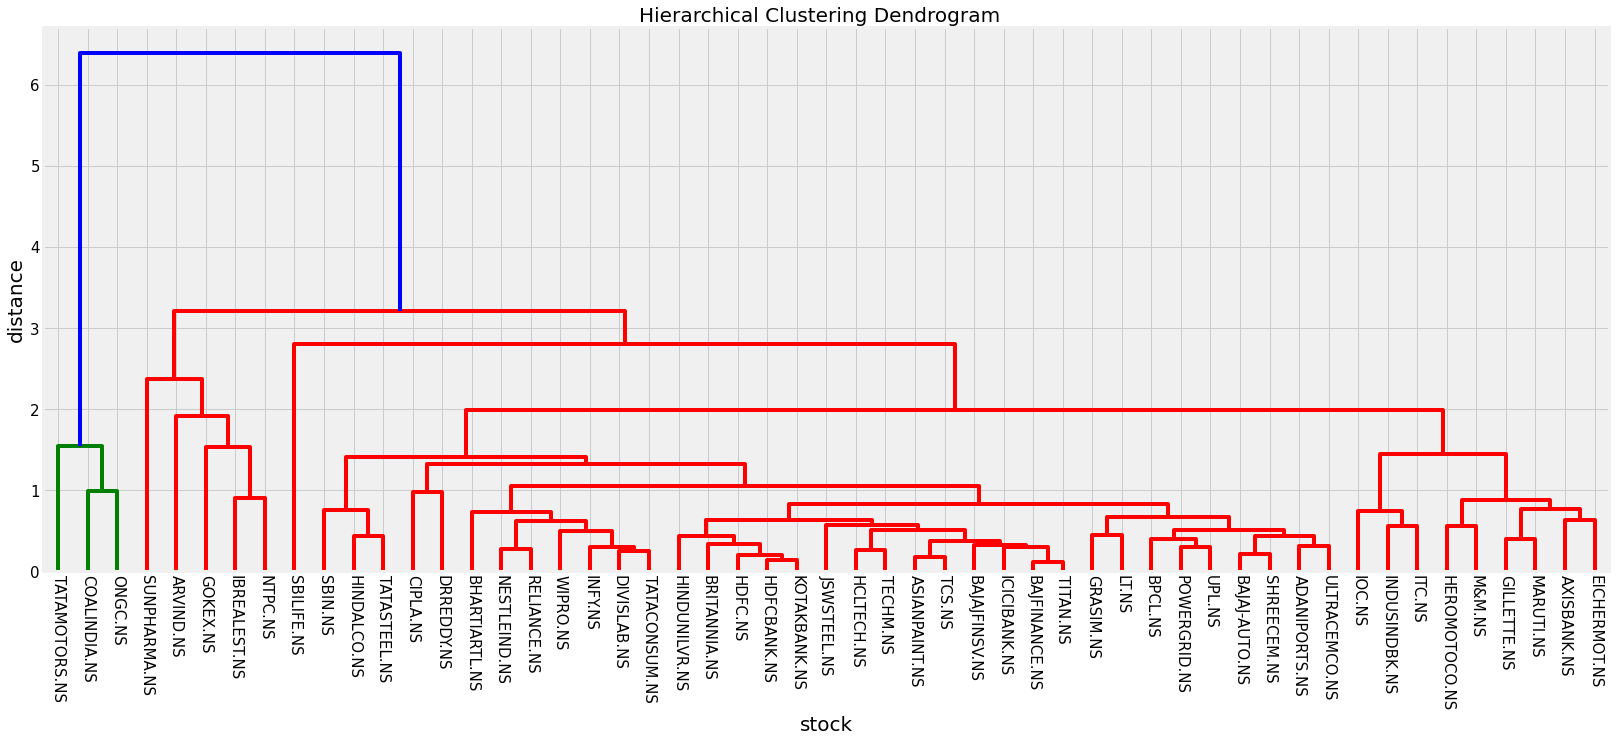

In [ ]:
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram '+index, fontsize=labelsize)
plt.xlabel('stock', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = corr.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
plt.show()

According to the dendogram above, the two most correlated stocks BAJFINANCE.NS and TITAN.NS and low correlated stocks are TATAMOTORS.NS and EICHERMOT.NS